# Finclub Dataset 
 Regression Model for Price and Signal datasets


In [1]:
#Importing Dependencies and loading dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df=pd.read_csv("finclub_dataset.csv")

In [2]:
df.head()

,Unnamed: 0,Date,Price,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7
0,0,30-11-2016,3737.977,2728.177,2971.1835,2079.2105,1779.8949,2519.4459,4910.96,8767.2587
1,1,29-11-2016,3747.922,2751.722,2982.1383,2084.7049,1795.4482,2525.0559,4910.96,8748.9140
2,2,28-11-2016,3742.924,2760.324,2969.1945,2087.6731,1792.6194,2530.6608,4938.16,8770.7012
3,3,25-11-2016,3762.695,2766.495,2921.0607,2088.0335,1749.1181,2524.3249,4965.36,8786.6132
4,4,23-11-2016,3748.024,2738.224,2922.8202,2082.5629,1743.9943,2517.9924,4938.16,8785.8550


#### Data preprocessing

In [3]:
# Checking if there are any null values in the dataset
df.isnull().sum()

Unnamed: 0    0
Date          0
Price         0
Signal1       0
Signal2       2
Signal3       2
Signal4       2
Signal5       0
Signal6       2
Signal7       2
dtype: int64

In [4]:
# Filling out the null values with their respective mean values

df['Signal2'].fillna(df['Signal2'].median(),inplace=True)
df['Signal3'].fillna(df['Signal3'].median(),inplace=True)
df['Signal4'].fillna(df['Signal4'].median(),inplace=True)
df['Signal6'].fillna(df['Signal6'].median(),inplace=True)
df['Signal7'].fillna(df['Signal7'].median(),inplace=True)

In [5]:
# Verifying that no null values are present in the dataset
df.isnull().sum()

Unnamed: 0    0
Date          0
Price         0
Signal1       0
Signal2       0
Signal3       0
Signal4       0
Signal5       0
Signal6       0
Signal7       0
dtype: int64

#### Creating Regression Model using Gradient Descent algorithm

In [6]:
# Splitting Features(Signals) and Target Value (Price)
X=df.iloc[:,3:10].values
Y=df.iloc[:,2].values
print(X)
print(Y)

[[2728.177  2971.1835 2079.2105 ... 2519.4459 4910.96   8767.2587]
 [2751.722  2982.1383 2084.7049 ... 2525.0559 4910.96   8748.914 ]
 [2760.324  2969.1945 2087.6731 ... 2530.6608 4938.16   8770.7012]
 ...
 [2348.89   2050.2    2789.8513 ... 1302.0062  422.96   5089.3104]
 [2342.6    2052.189  2790.3273 ... 1300.3776  422.96   5081.3578]
 [2352.97   2041.173  2799.135  ... 1298.7507  395.76   5060.5532]]
[3737.977 3747.922 3742.924 ... 2012.29  2019.6   2043.57 ]


In [7]:
# Train Test splitting
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=50)

print(X.shape,X_train.shape,X_test.shape)

(3000, 7) (2400, 7) (600, 7)


In [8]:
# Scaling the training dataset
scalar=StandardScaler()
X_train_norm=scalar.fit_transform(X_train)
print(X_train_norm)

[[-1.05602497 -0.51465324 -0.37225683 ...  0.19864913 -0.14142663
   0.30440678]
 [ 1.01922023  0.95198425  1.47157881 ... -1.32363037 -1.08235565
  -1.5571116 ]
 [-0.43190533 -0.58099119  0.00640237 ...  0.0357599  -0.31987869
   0.09207256]
 ...
 [-1.21589902 -0.83512978 -0.40345509 ... -0.18467256 -0.82278903
   0.03396232]
 [-0.95504523 -0.62334762 -0.31931859 ...  0.19694056  0.00457959
   0.3642354 ]
 [-1.21408753 -1.46257791 -0.3454027  ... -0.04401074 -0.35232452
   0.3839942 ]]


In [9]:
# implementing Gradient Descent algorithm
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_train_norm, Y_train)


SGDRegressor()

In [10]:
# Finding out the relation between signals and price using parameters
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:  w: {w_norm}, b:{b_norm}")

model parameters:  w: [ 283.90078365  415.187762     81.6306833  -707.90596367  -96.19803847
  302.41385469 -296.92706164], b:[2487.62389358]


The relation between the signals and price that was found using SGD algorithm:
y= w1*x1 + w2*x2 +..... w7*x7 + b;
wherein
y is the price, 
w1,w2,w3....w7 are the weight parameters/ coefficients of signals and
x1,x2,x3.....x7 are the 7 signals respectively

In [11]:
# make a prediction using sgdr.predict()
Y_test = sgdr.predict(X_train_norm)

print(f"Prediction on training set:\n{Y_test[:4]}" )
print(f"Target values \n{Y_train[:4]}")

Prediction on training set:
[1923.60075016 2243.09804929 1900.11582117 2098.2388981 ]
Target values 
[1932.951 2239.988 1885.606 2101.03 ]


Comparing the above predicted price and actual target values shows us that the regression model built fits well for the given dataset.

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Signal1'}>],
       [<Axes: title={'center': 'Signal2'}>,
        <Axes: title={'center': 'Signal3'}>,
        <Axes: title={'center': 'Signal4'}>],
       [<Axes: title={'center': 'Signal5'}>,
        <Axes: title={'center': 'Signal6'}>,
        <Axes: title={'center': 'Signal7'}>]], dtype=object)

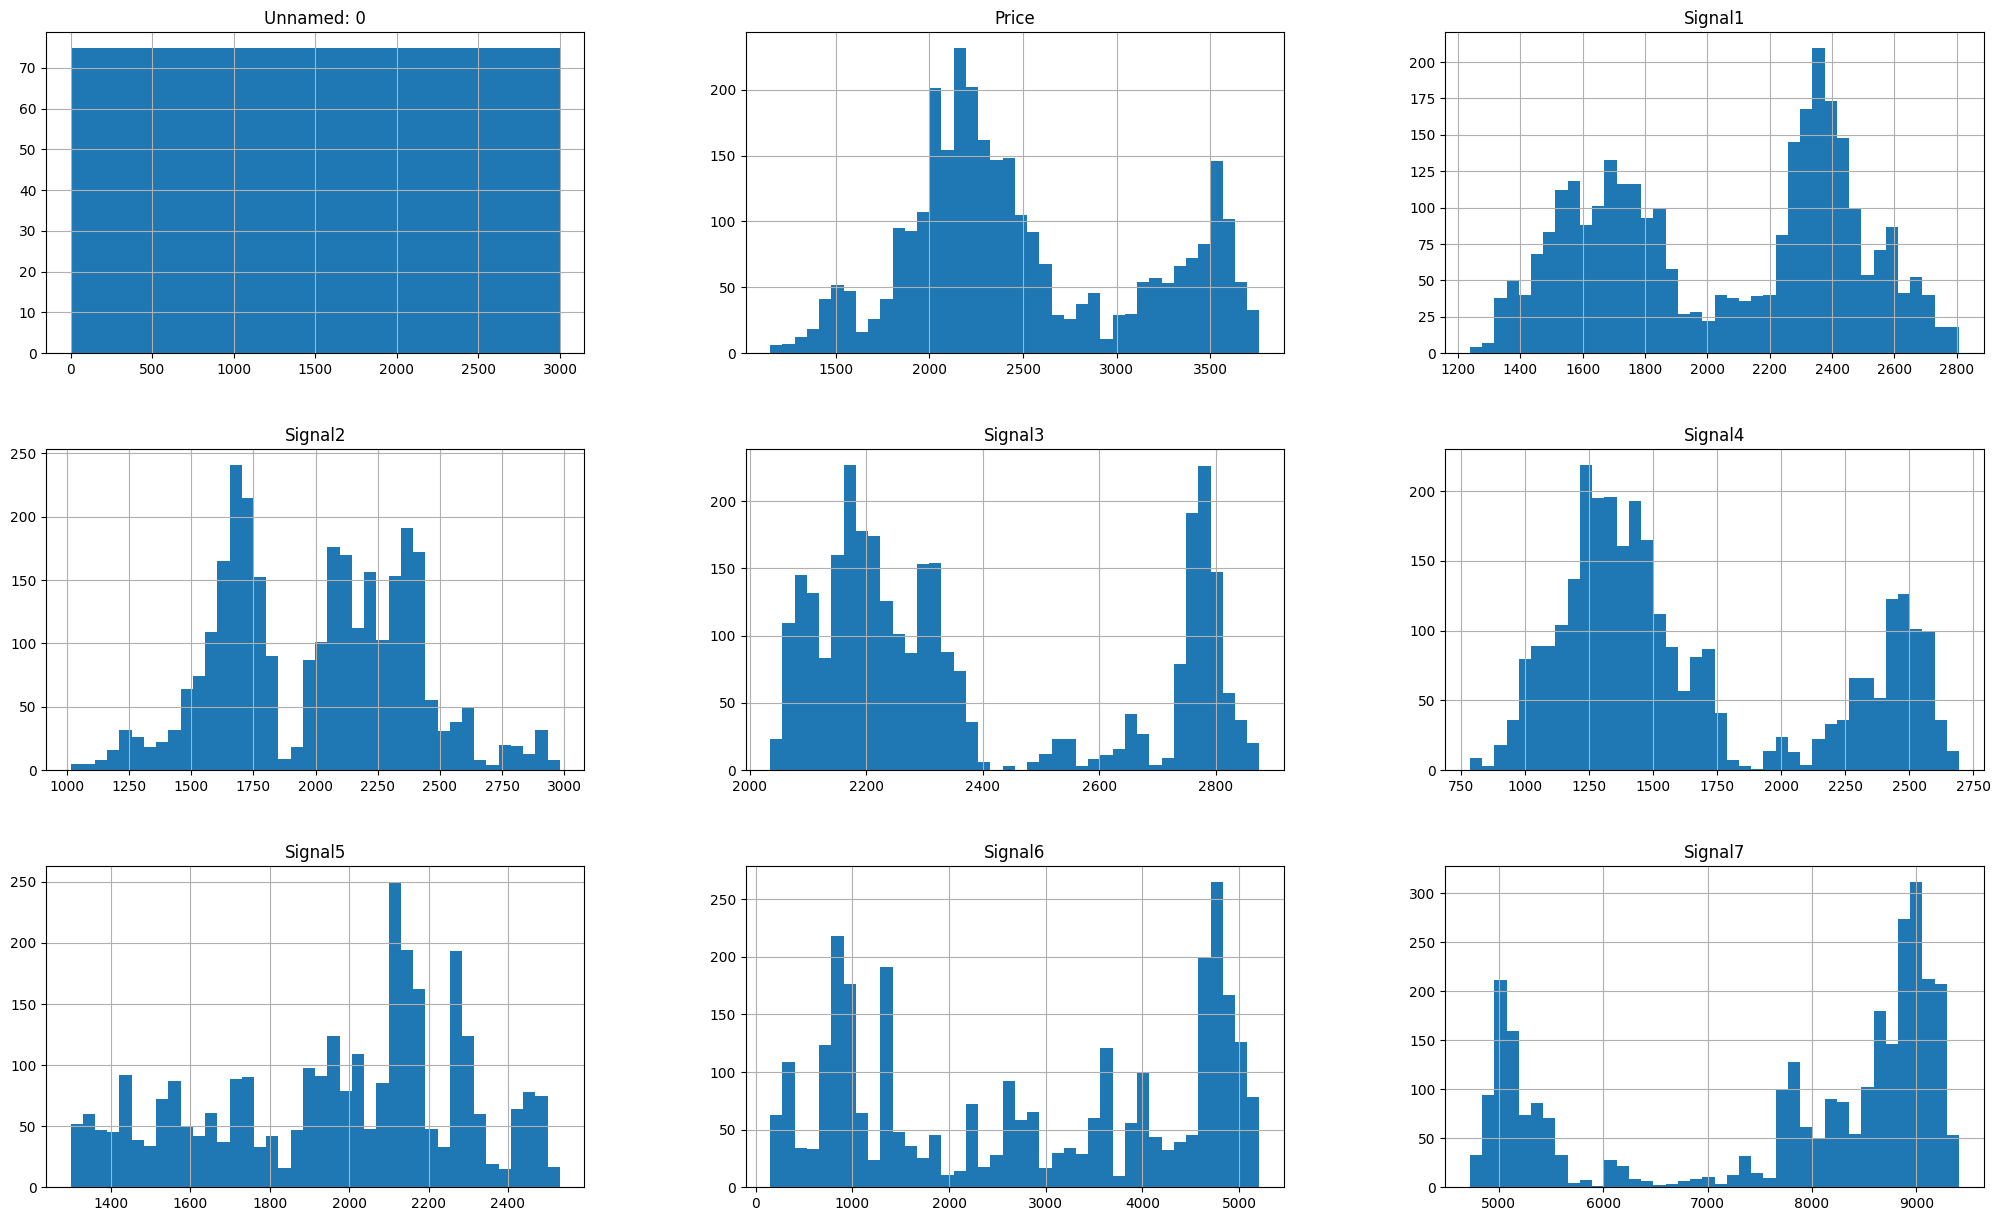

In [12]:
%matplotlib inline
df.hist(bins=40, figsize=(25,15))

#### Plot based conclusion
The above plots show that price is more dependent on a few signals such as Signals-1,2 and 5.
While it is negatively correlated with a few signals such as Signals 3 and 4 along with a little to moderate dependency on the remaining signals.


In [13]:
# Verifying above conclusion using correlation
corr_matrix = df.corr()
corr_matrix["Price"].sort_values(ascending=False)

C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_22684\3455333042.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Price         1.000000
Signal2       0.731233
Signal6       0.730187
Signal5       0.638312
Signal1       0.471210
Signal7       0.379624
Signal4      -0.243249
Signal3      -0.430614
Unnamed: 0   -0.750013
Name: Price, dtype: float64

It could be clearly confirmed using graph as well as correlation, the relationship between assets price and the signals. 